In [36]:
from classes.dataManagement import DataManagement 
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import difflib

dm = DataManagement()
meanImages = []
for i in range(0,10):
    meanImages.append(dm.getMeanImage(i));
meanImages = np.array(meanImages);

meanForY = []
for i in dm.trainLabels:
    meanForY.append(meanImages[i]/255)
meanForY = np.array(meanForY)


# 1. Dataset

In [60]:
x = np.array(dm.trainImages)
y = np.array(dm.trainLabels)

x = x / 255 #divise by 255 because each value is a white value (0 to 255)
y = y.reshape(len(y), 1)


X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)
print(y.shape)

#theta
theta = np.random.rand(len(X[0]),1)
print(theta.shape)

(60000, 785)
(60000, 1)
(785, 1)


# Modèle

In [62]:
#Modèle
def model(X, theta):
    return X.dot(theta)

In [64]:
print(model(X,theta))
#plt.plot(x, model(X,theta))

[[54.19493374]
 [59.7415739 ]
 [39.23943912]
 ...
 [42.72813284]
 [40.47580904]
 [40.71729792]]


In [41]:
def cost_function(X, meanY, theta):
    m = len(y)
    return 1/m * np.sum(np.sum((model(X, theta) - meanY)))

In [65]:
cost_function(X, meanForY, theta)

39335.574796804074

In [6]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [7]:
def gradient_descent(X, y, theta, learningRate, nbIteration):
    cost_history = np.zeros(nbIteration)
    for i in range(0, nbIteration):
        theta = theta - learningRate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Machine learning

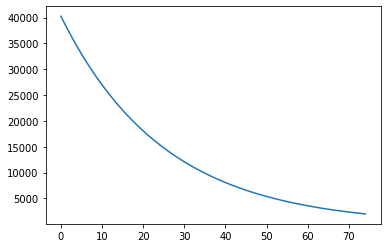

In [43]:
n = 75
thetaFinal, cost_history = gradient_descent(X, meanForY, theta, learningRate = 0.001, nbIteration = n)
plt.plot(range(n), cost_history)


# Coefficient de détermination

In [31]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [27]:
def test(prediction, i):
    m = len(prediction)
    return 1/m * np.sum(prediction - dm.getMeanImage(i))

-779.1338361650871


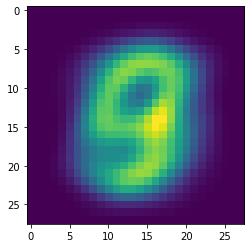

In [44]:
predictions = model(X, thetaFinal)

print(coef_determination(meanForY, predictions))


nb = 2
nbb = 0
test = np.array(predictions[nb])
test = test.reshape(784, 1)
test = test.reshape(28, 28)

plt.imshow(test)

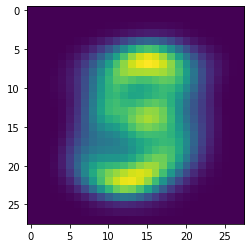

In [112]:
test2 = np.array(predictions[nbb])
test2 = test2.reshape(784, 1)
test2 = test2.reshape(28, 28)
plt.imshow(test2)